Ejercicio 3.B
Siguiendo con el DataFrame anterior:

Para las 4 columnas de las características de las flores y el tipo de flor, crea 5 nuevas columnas que se llamen igual pero con el prefijo normalizado_. Esas 5 nuevas columnas tendrán los valores según la fórmula:
    valor = (X - media) / (max - min)

Para las 4 columnas de las características de las flores y el tipo de flor, crea 5 nuevas columnas que se llamen igual pero con el prefijo standarizado_. Esas 5 nuevas columnas tendrán los valores según la fórmula:
    valor = (X - media) / desviacion

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random
import tabulate

sample_data_flowers = load_iris()
columns = sample_data_flowers.feature_names
# print(dir(sample_data_flowers))
# print(sample_data_flowers.data)

data_frame_flowers: pd.DataFrame = pd.DataFrame(sample_data_flowers.data, columns=columns)
data_frame_flowers['flower type'] = sample_data_flowers.target
data_frame_flowers.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
def compile_fit(layers_epochs, model_x, model_y):
    tf.keras.utils.set_random_seed(5)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    number_of_columns = len(model_x[0])

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=number_of_columns))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    timestamp_before = time.time_ns()
    history = model.fit(model_x, model_y, epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": history
    }

In [5]:
neuronal_nets = [
    [2, 4, 2, 1],
    [4, 8, 4, 1],
    [8, 16, 8, 1],
    [4, 8, 4, 2, 1],
    [8, 16, 8, 4, 1],
    [16, 32, 16, 8, 1],
    [32, 64, 32, 8, 1],
    [64, 128, 64, 8, 1],
    [8, 16, 32, 64, 32, 16, 8, 1]
]

In [6]:
my_x = data_frame_flowers.loc[:, data_frame_flowers.columns != 'flower type']
my_y = data_frame_flowers['flower type']

In [7]:
global_metrics = pd.DataFrame([], columns=['Neuronal net', 'Epoch', 'Loss'])

In [8]:
for net in neuronal_nets:
    model_metrics = compile_fit([net, 40], my_x.to_numpy(), my_y.to_numpy())

    model_history = model_metrics["history"]

    for idx, loss in enumerate(model_history.history["loss"]):
        global_metrics.loc[len(global_metrics)] = [(','.join(map(str, net))), idx + 1, loss]

print(global_metrics)

             Neuronal net  Epoch      Loss
0                 2,4,2,1      1  0.915512
1                 2,4,2,1      2  0.913396
2                 2,4,2,1      3  0.911883
3                 2,4,2,1      4  0.910491
4                 2,4,2,1      5  0.909237
..                    ...    ...       ...
355  8,16,32,64,32,16,8,1     36  0.333347
356  8,16,32,64,32,16,8,1     37  0.333346
357  8,16,32,64,32,16,8,1     38  0.333344
358  8,16,32,64,32,16,8,1     39  0.333344
359  8,16,32,64,32,16,8,1     40  0.333342

[360 rows x 3 columns]


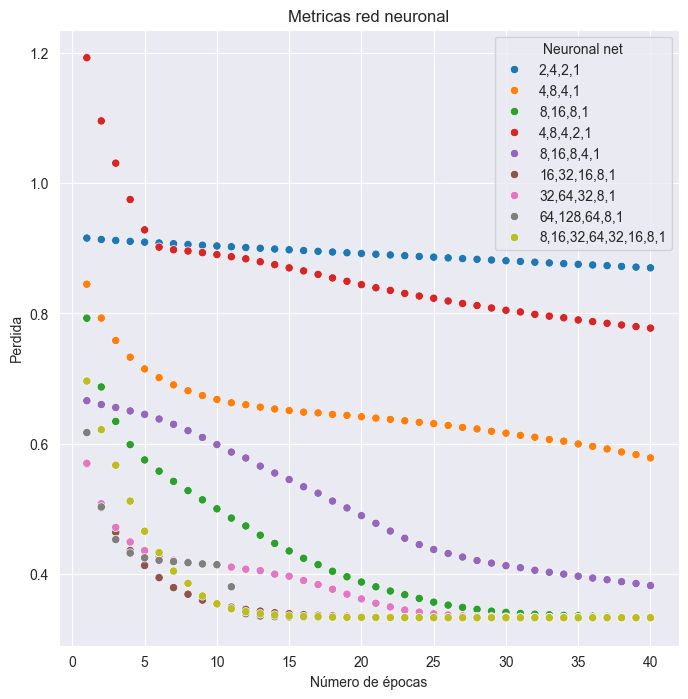

In [9]:
figure = plt.figure(figsize=(8, 8))
axes = figure.add_subplot()

sns.scatterplot(x="Epoch", y="Loss", hue="Neuronal net", data=global_metrics, ax=axes)
plt.title('Metricas red neuronal')
plt.xlabel('Número de épocas')
plt.ylabel('Perdida')
plt.show()